<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Adjust-Units-of-Measurements" data-toc-modified-id="Adjust-Units-of-Measurements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Adjust Units of Measurements</a></span></li><li><span><a href="#Consolidate-Information-about-Lines" data-toc-modified-id="Consolidate-Information-about-Lines-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Consolidate Information about Lines</a></span></li><li><span><a href="#Convert-Runtime-into-Expected-Drive-Time-and-Dwell-Time" data-toc-modified-id="Convert-Runtime-into-Expected-Drive-Time-and-Dwell-Time-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert Runtime into Expected Drive Time and Dwell Time</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Distance-Between-Stations-(m)" data-toc-modified-id="Distance-Between-Stations-(m)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distance Between Stations (m)</a></span></li><li><span><a href="#Drive-Time-between-Stations-(s)" data-toc-modified-id="Drive-Time-between-Stations-(s)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Drive Time between Stations (s)</a></span></li><li><span><a href="#Dwell-Times-(s)" data-toc-modified-id="Dwell-Times-(s)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dwell Times (s)</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#The-Infrastructure-(Stations,-Depots-etc)" data-toc-modified-id="The-Infrastructure-(Stations,-Depots-etc)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Infrastructure (Stations, Depots etc)</a></span><ul class="toc-item"><li><span><a href="#Depots" data-toc-modified-id="Depots-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Depots</a></span></li><li><span><a href="#Stations" data-toc-modified-id="Stations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Stations</a></span></li><li><span><a href="#Cross-Overs" data-toc-modified-id="Cross-Overs-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Cross-Overs</a></span></li></ul></li><li><span><a href="#The-Network" data-toc-modified-id="The-Network-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The Network</a></span></li><li><span><a href="#Trains" data-toc-modified-id="Trains-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Trains</a></span></li><li><span><a href="#Incidents" data-toc-modified-id="Incidents-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Incidents</a></span></li></ul></li><li><span><a href="#Utilities" data-toc-modified-id="Utilities-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Utilities</a></span><ul class="toc-item"><li><span><a href="#Global-Parameters" data-toc-modified-id="Global-Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Global Parameters</a></span></li><li><span><a href="#Time-Parsing-and-Formating" data-toc-modified-id="Time-Parsing-and-Formating-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Time Parsing and Formating</a></span></li></ul></li><li><span><a href="#Setting-System-Parameters" data-toc-modified-id="Setting-System-Parameters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setting System Parameters</a></span></li><li><span><a href="#System-Verification" data-toc-modified-id="System-Verification-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>System Verification</a></span><ul class="toc-item"><li><span><a href="#Normal-Operations" data-toc-modified-id="Normal-Operations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Normal Operations</a></span></li><li><span><a href="#Incidents" data-toc-modified-id="Incidents-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Incidents</a></span></li></ul></li><li><span><a href="#Validate-System" data-toc-modified-id="Validate-System-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validate System</a></span><ul class="toc-item"><li><span><a href="#Metropolitan-Line" data-toc-modified-id="Metropolitan-Line-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Metropolitan Line</a></span></li><li><span><a href="#Piccadilly" data-toc-modified-id="Piccadilly-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Piccadilly</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Load Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np

import simpy

# Prepare Data

In [2]:
dt=pd.read_csv('LondonTube.csv')

In [3]:
dt.head()

,Line,Direction,From,To,Distance,Running Time,Peak Running Time,Off-Peak Running Time
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1.74,2.23,2.50,2.50
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1.40,1.88,2.00,2.00
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,0.90,1.50,1.50,1.50
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1.27,1.92,2.06,2.06
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1.71,2.23,3.13,3.13


## Adjust Units of Measurements

Convert distances to meters

In [4]:
dt['Distance']=dt['Distance'].apply(lambda x: int(x*1000))

Convert running times into seconds

In [5]:
dt['Running Time']=dt['Running Time'].apply(lambda x: int(x*60))
dt['Peak Running Time']=dt['Peak Running Time'].apply(lambda x: int(x*60))
dt['Off-Peak Running Time']=dt['Off-Peak Running Time'].apply(lambda x: int(x*60))

In [6]:
dt.head()

,Line,Direction,From,To,Distance,Running Time,Peak Running Time,Off-Peak Running Time
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1740,133,150,150
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1400,112,120,120
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,900,90,90,90
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1270,115,123,123
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1710,133,187,187


## Consolidate Information about Lines

Note: A short looping branch line of the Central Line has been deleted from the original data set.

In [7]:
list(dt['Line'].unique())

['Bakerloo',
 'Central',
 'Victoria',
 'Waterloo & City',
 'Jubilee',
 'Northern',
 'Piccadilly',
 'Metropolitan',
 'H & C',
 'Circle',
 'District',
 'East London']

In [8]:
list(dt.Direction.unique())

['Southbound', 'Northbound', 'Eastbound', 'Westbound', 'Inner', 'Outer']

Note: Each line has its specific rolling stock with drive parameters depending on the track geometry, electrical power supply, and the year of construction. For simplicity we assume fixed parameters across the network.  

In [9]:
lines=dt['Line'].unique()
dl=pd.DataFrame(lines, columns=['Line'])
dl=dl.set_index('Line')

dl

""
Line
Bakerloo
Central
Victoria
Waterloo & City
Jubilee
Northern
Piccadilly
Metropolitan
H & C


In [10]:
dl['Direction 1']=None
dl['Direction 2']=None
for l in lines:
    
    dirs = dt[dt['Line']==l]['Direction'].unique()
    dirs = sorted(list(dirs))
    if len(dirs)!=2:
        print("Problem with line: ", l, dirs)
    dl.at[l, 'Direction 1']=dirs[0]
    dl.at[l, 'Direction 2']=dirs[1]
    
dl

,Direction 1,Direction 2
Line,,
Bakerloo,Northbound,Southbound
Central,Eastbound,Westbound
Victoria,Northbound,Southbound
Waterloo & City,Eastbound,Westbound
Jubilee,Eastbound,Westbound
Northern,Northbound,Southbound
Piccadilly,Eastbound,Westbound
Metropolitan,Eastbound,Westbound
H & C,Eastbound,Westbound


In [11]:
dl['Stations']=None
dl['Total Dist']=None
dl['Min Dist']=None
dl['Avg Dist']=None
dl['Max Dist']=None

dl['Total Running Time']=None

for l in lines:
    
    dist = dt[dt['Line']==l]['Distance']
    dl.at[l, 'Stations']=int(dist.count()/2)
    dl.at[l, 'Total Dist']=int(dist.sum()/2)
    dl.at[l, 'Min Dist']=int(dist.min())
    dl.at[l, 'Avg Dist']=int(dist.mean())
    dl.at[l, 'Max Dist']=int(dist.max())
    
    time = dt[dt['Line']==l]['Running Time']
    dl.at[l, 'Total Running Time']=int(time.sum()/2)
    dl.at[l, 'Max Running Time']=int(time.max())

dl

,Direction 1,Direction 2,Stations,Total Dist,Min Dist,Avg Dist,Max Dist,Total Running Time,Max Running Time
Line,,,,,,,,,
Bakerloo,Northbound,Southbound,24,23230,370,967,1740,2521,169.0
Central,Eastbound,Westbound,45,67520,400,1500,3340,5279,192.0
Victoria,Northbound,Southbound,15,21250,740,1416,3150,1865,255.0
Waterloo & City,Eastbound,Westbound,1,2370,2370,2370,2370,272,292.0
Jubilee,Eastbound,Westbound,26,36950,440,1421,2850,3058,208.0
Northern,Northbound,Southbound,51,57700,270,1131,2460,6100,277.0
Piccadilly,Eastbound,Westbound,49,66874,250,1350,4420,5961,339.0
Metropolitan,Eastbound,Westbound,35,87689,510,2505,11630,6962,661.0
H & C,Eastbound,Westbound,27,25410,510,941,2290,2929,226.0


Latere we will add a few columns for line specific parameters.

In [12]:
dl['max a']=0.7
dl['max v']=25

dl.at['Metropolitan', 'max a'] = 0.8
dl.at['Metropolitan', 'max v'] = 40
dl

,Direction 1,Direction 2,Stations,Total Dist,Min Dist,Avg Dist,Max Dist,Total Running Time,Max Running Time,max a,max v
Line,,,,,,,,,,,
Bakerloo,Northbound,Southbound,24,23230,370,967,1740,2521,169.0,0.7,25
Central,Eastbound,Westbound,45,67520,400,1500,3340,5279,192.0,0.7,25
Victoria,Northbound,Southbound,15,21250,740,1416,3150,1865,255.0,0.7,25
Waterloo & City,Eastbound,Westbound,1,2370,2370,2370,2370,272,292.0,0.7,25
Jubilee,Eastbound,Westbound,26,36950,440,1421,2850,3058,208.0,0.7,25
Northern,Northbound,Southbound,51,57700,270,1131,2460,6100,277.0,0.7,25
Piccadilly,Eastbound,Westbound,49,66874,250,1350,4420,5961,339.0,0.7,25
Metropolitan,Eastbound,Westbound,35,87689,510,2505,11630,6962,661.0,0.8,40
H & C,Eastbound,Westbound,27,25410,510,941,2290,2929,226.0,0.7,25


## Convert Runtime into Expected Drive Time and Dwell Time

Physics Calculation: time to travel a given distance based on acceleration and max velocity

In [13]:
def timeTo(a, maxV, d):
    # a       constant acceleration, m/s²
    # maxV    maximumum velocity, m/s
    # d       distance, km
    # return  time in seconds required to travel
    # 
    ta = maxV/a         # time to accelerate to maxV
    da = a*ta**2        # distance traveled during acceleration from 0 to maxV and back to 0
    if (d < da):        # train never reaches full speed?
        return np.sqrt(4.0*d/a)     # time needed to accelerate to half-way point then decelerate to destination
    else:
        return 2*ta + (d-da)/maxV   # time to accelerate to maxV plus travel at maxV plus decelerate to destination

In [14]:
dt['Drive Time'] = None
for i in range(len(dt)):
    dist = dt.at[i, 'Distance']
    l = dt.at[i, 'Line']
    a = dl.at[l, 'max a']
    v = dl.at[l, 'max v']
    dt.at[i, 'Drive Time']=int(timeTo(a, v, dist))

In [15]:
dt['Dwell Time']=dt['Running Time']-dt['Drive Time']

In [16]:
dt['Peak Dwell Time']=dt['Peak Running Time']-dt['Drive Time']

In [17]:
dt['Off-Peak Dwell Time']=dt['Off-Peak Running Time']-dt['Drive Time']

In [18]:
dt=dt.drop(columns=['Running Time', 'Peak Running Time', 'Off-Peak Running Time'])

In [19]:
dt.head()

,Line,Direction,From,To,Distance,Drive Time,Dwell Time,Peak Dwell Time,Off-Peak Dwell Time
0,Bakerloo,Southbound,HARROW & WEALDSTONE,KENTON,1740,105,28,45,45
1,Bakerloo,Southbound,KENTON,SOUTH KENTON,1400,91,21,29,29
2,Bakerloo,Southbound,SOUTH KENTON,NORTH WEMBLEY,900,71,19,19,19
3,Bakerloo,Southbound,NORTH WEMBLEY,WEMBLEY CENTRAL,1270,86,29,37,37
4,Bakerloo,Southbound,WEMBLEY CENTRAL,STONEBRIDGE PARK,1710,104,29,83,83


# Exploratory Data Analysis

## Distance Between Stations (m)

In [20]:
dt['Distance'].min()

250

In [21]:
dt['Distance'].max()

11630

In [22]:
dt['Distance'].mean()

1304.2723521320495

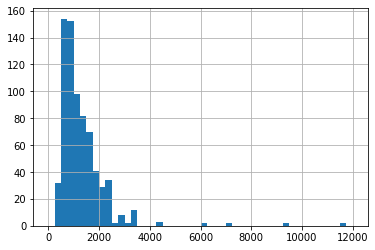

In [23]:
dt['Distance'].hist(bins=np.linspace(0, 12000, 49))

## Drive Time between Stations (s)

In [24]:
dt['Drive Time'].min()

37

In [25]:
dt['Drive Time'].max()

340

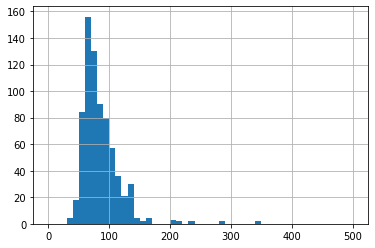

In [26]:
dt['Drive Time'].hist(bins=np.linspace(0, 500, 51))

## Dwell Times (s)

In [27]:
dt['Peak Dwell Time'].min()

10

In [28]:
dt['Peak Dwell Time'].max()

350

In [29]:
dt['Peak Dwell Time'].mean()

61.06189821182944

In [30]:
dt['Peak Dwell Time'].std()

43.48164196678141

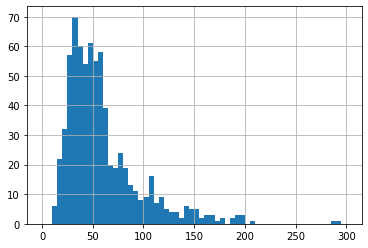

In [31]:
dt['Peak Dwell Time'].hist(bins=np.linspace(0, 300, 61))

In [32]:
dt['Off-Peak Dwell Time'].min()

10

In [33]:
dt['Off-Peak Dwell Time'].max()

350

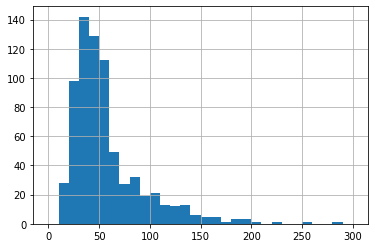

In [34]:
dt['Off-Peak Dwell Time'].hist(bins=np.linspace(0, 300, 31))

# Modelling

Components of the system will be described by Python classes. The parameters are passed as data frames.

We assume that the global variable `env` is initialised before any component of the system is actually generated.

## The Infrastructure (Stations, Depots etc)

The class NetworkNode is used as the common base class for all infrastructure classes. Each NetworkNode (like a station) has a name and belongs to a track, i.e. a line and a direction.

In [35]:
class NetworkNode:
    
    def __init__(self, location, line):
        self.location=location
        self.line=line
        self.tracing=False
        self.incidents=[]

    # is only used in connection with tracing
    def setTrack(self, track):
        self.track=track
        
    def isTracing(self):
        return self.tracing and self.track.isTracing()
    
    def trace(self):
        self.tracing=True
        
    def trace_prefix(self, train):
        global max_line_name_length
        global max_direction_length
        return f"{now():s} " \
               f"{self.line:{max_line_name_length}s} " \
               f"[Train {train.getNo():2d} " \
               f"{train.getDirection():{max_direction_length}s}]"
    
    def arr(self, train):
        if self.isTracing() and train.isTracing():
            print(f"{self.trace_prefix(train):s} arr {self.loc():s}")        

    def dep(self, train, dest):
        if self.isTracing() and train.isTracing():
            print(f"{self.trace_prefix(train):s} dep {self.loc():s} for {dest.loc():s}")
        
    def loc(self):
        return self.location
    
    def __str__(self):
        return self.location
    

    def getResource(self):
        pass
    
    # NEW: Incident Handling
    # trace output for incident
    def inc(self, train):
        if self.isTracing() or train.isTracing():
            delay=self.incidentDelay()
            message=f"expected delay {daytime(delay):s}" if delay>0 else "incident cleared"
            print(f"{self.trace_prefix(train):s} inc {self.loc():s} {message:s}")        
            
    # registers an incident
    def registerIncident(self, incident):
        self.incidents+=[incident]
        
    # checks if there is currently an incident in progress
    # if yes, it returns True otherwise False
    def isIncident(self):
        for inc in self.incidents:
            if inc.active():
                return True
        return False
        
    # if there is currently an incident in progress it returns
    # the time the incident will probably continue, otherwise it returns 0
    def incidentDelay(self):
        stopTime=0
        for incident in self.incidents:
            if incident.active():
                stopTime=max(stopTime, incident.stopTime())
        return 0 if stopTime==0 else stopTime-env.now

### Depots

A train depot serves a line and feeds trains into a particular direction.

In [36]:
class Depot(NetworkNode):
    def __init__(self, location, line, direction):
        super().__init__(location+" (DEPOT)", line)
        self.direction=direction
        
    def driveTime(self):
        return 20
    
    def dwellTime(self):
        return 10
    
    def dep(self, train, dest):
        train.setDirection(self.direction)
        super().dep(train, dest)
        
    def getResource(self):
        return None

### Stations

A Station object describes a track in a physical station. Hence we use a station object for each of the directions of a line going through the station. 

Normally we have therefore two stations in a location. When two lines are crossing at an interchange, we will have actually 4 station objects sharing the same common name: two (for each direction) for each of the lines.  As such a "station" in our terminology is more like a platform or a track in a real life station.

The common name of the physical station can be accessed as `loc()`. 

In [37]:
class Station(NetworkNode):
    def __init__(self, location, line, direction):
        super().__init__(location, line)
        self.location=location
        self.line=line
        self.direction=direction
        self.resource=simpy.Resource(env, capacity=1)
        
        dd=dt[dt['Line']==self.line]
        dd=dd[dd['Direction']==self.direction]
        dd=dd[dd['From']==location]
        
        if len(dd)==0:
            # last node in a direction, the last passengers leave the train
            # and the train moves into the Cross-Over or the Depot
            self.drive_time=20
            self.off_peak_dwell_time=60
            self.peak_dwell_time=60
        else:
            self.drive_time=dd.iloc[0].at['Drive Time']
            self.off_peak_dwell_time=dd.iloc[0].at['Off-Peak Dwell Time']
            self.peak_dwell_time=dd.iloc[0].at['Peak Dwell Time']

    def driveTime(self):
        return self.drive_time
    
    def dwellTime(self):
        return self.peak_dwell_time if isPeakTime() else self.off_peak_dwell_time
    
    def __str__(self):
        return self.location + " (" + self.direction[0] + ")"

    def getResource(self):
        return self.resource

### Cross-Overs

A cross over node is attached to the last station at the end of a line and allows trains to switch direction. 
A cross over node shares the location name and the line with the station it is attached to, however is serves actually both directions. A cross over node may have a limited capacity holding trains.

The drive time (in and out of the cross over node) is assumed as a fixed constant, as is the dwell time in the cross over node. These parameters could in the future also be stored in the line table.

In [38]:
class CrossOver(NetworkNode):
    def __init__(self, location, line, direction, capacity=2):
        super().__init__(location+" (X)", line)
        self.direction=direction
        self.resource=simpy.Resource(env, capacity=2)
        
    def driveTime(self):
        return 20
    
    def dwellTime(self):
        return 300
    
    def dep(self, train, dest):
        train.setDirection(self.direction)
        super().dep(train, dest)
        
    def getResource(self):
        return self.resource

## The Network

A track describes a direction of a line. The parameters describing a track are:
- The start and stop times of the line (for example 6:00 to 23:00),
- The time between trains (for example every 5 minutes), but this may vary during the day.

The parameters for a line will later be taken from the line table. For the time being we use a simple procedure running the simulation of a single track.

In [39]:
class Track(object):
    def __init__(self, network, line, direction, depot, stations):
        self.network=network
        self.line=line
        self.direction=direction

        # extract line specific parameters
        self.start = dl.at[line, 'start']
        self.stop  = dl.at[line, 'stop']
        self.freq  = dl.at[line, 'freq']
        
        self.track=[depot]+stations+[depot]
        for s in self.track:
            s.setTrack(self)
            
        self.tracing=False
        self.tracingTrains=False
        self.tracingTrainNos=[]
    
    def isTracing(self):
        return self.tracing and self.network.isTracing()

    def isTracingTrains(self):
        return self.tracingTrains and self.network.isTracing()
    
    def trace(self, loc=None, train=None):
        self.tracing=True
        if loc is None:
            for s in self.track:
                s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)
        else:
            for s in self.track:
                if s.loc()==loc:
                    s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)

    def getNetwork(self):
        return self.network
    
    def getLine(self):
        return self.line
    
    def getName(self):
        if self.direction is None:
            return self.line
        else:
            return self.line + " ("+self.direction+")"
    
    def getStations(self):
        return self.track
    
    def process(self):
        yield env.timeout(self.start-env.now) # the line starts operating at 6am
        for i in range(int((self.stop-self.start)/self.freq)):
            t=Train(i, self)
            if self.tracingTrains and i in self.tracingTrainNos:
                t.trace()
            env.process(t.process())
            yield env.timeout(self.freq)     
            
    def __str__(self):
        direction = "" if self.direction is None else " ("+self.direction+")"
        stations = " - ".join([ str(s) for s in self.track ])
        return self.line + direction + ": " + stations

In [40]:
def allStations(line, direction):
    dl=dt[dt['Line']==line]
    ds=dl[dl['Direction']==direction]
    stations=ds['From'].to_list()
    stations+=[ds['To'].to_list()[-1]]
    return [ Station(s, line, direction) for s in stations ]

In [41]:
def allTracks(network):
    lines=[]
    for line in dt['Line'].unique():
        directions=dt[dt['Line']==line]['Direction'].unique()
        stations=[ allStations(line, d) for d in directions]
        
        if stations[0][0].loc()==stations[0][-1].loc() and \
                stations[1][0].loc()==stations[1][-1].loc():
            # create inner circular tracks
            depot = Depot(stations[0][0].loc(), line, directions[0])
            l = Track(network, line, directions[0], depot, stations[0])
            lines += [l]
            
            # create outer circular tracks
            depot = Depot(stations[1][0].loc(), line, directions[1])
            l = Track(network, line, directions[1], depot, stations[1])
            lines += [l]
        
        elif stations[0][-1].loc()==stations[1][0].loc() and \
                stations[0][0].loc()==stations[1][-1].loc():
            # create linear track combining both directions with cross-over node
            depot = Depot(stations[0][0].loc(), line, directions[0])
            x = CrossOver(stations[0][-1].loc(), line, directions[1])
            l = Track(network, line, None, depot, stations[0]+[x]+stations[1])
            lines+=[l]

    return lines

In [42]:
class Network(object):
    def __init__(self):
        self.tracks=allTracks(self)
        
        self.tracing=False
        self.tracingStart=None
        self.tracingStop=None
        
    def getTracks(self):
        return self.tracks
    
    def isTracing(self):
        return self.tracing and \
                (self.tracingStart is None or self.tracingStart<=env.now) and \
                (self.tracingStop is None or env.now <= self.tracingStop)
    
    def trace(self, line=None, loc=None, train=None, start=None, stop=None):
        self.tracing = True
        self.tracingStart = parseTime(start)
        self.tracingStop = parseTime(stop)
        if line is None:
            for t in self.tracks:
                t.trace(loc=loc, train=train)
        else:
            for t in self.tracks:
                if t.getLine()==line:
                    t.trace(loc=loc, train=train)
    
    def registerIncident(self, start, stop, line=None, direction=None, loc=None):
        incident = Incident(start, stop)
        for t in self.tracks:
            if line is None or t.getLine()==line:
                for s in t.getStations():
                    if direction is None or s.getDirection()==direction:
                        if loc is None or s.loc()==loc:
                            s.registerIncident(incident)
    
    def process(self):
        for t in self.tracks:
            # the process method has to be a generator, therefore we are
            # adding a meaningless timeout
            yield env.timeout(0)
            env.process(t.process())
            

## Trains

In [43]:
class Train(object):  
    def __init__(self, i, track):
        self.no=i
        self.track = track

        self.direction = None
        self.tracing = False

    def setDirection(self, direction):
        self.direction=direction

    def getDirection(self):
        return self.direction
    
    def getNo(self):
        return self.no
    
    def isTracing(self):
        return self.track.isTracing() and \
                (not self.track.isTracingTrains() or self.tracing)
    
    def trace(self):
        self.tracing=True
            
    def traceOff(self):
        self.tracing=False
        
    def process(self):

        stations = self.track.getStations()
        
        here = stations[0]
        here_req = None
        
        for dest in stations[1:]:
            
  
            drivetime=here.driveTime()
            dwelltime=here.dwellTime()
            
            yield env.timeout(dwelltime)

            if here.isIncident():
                here.inc(self)
                yield env.timeout(here.incidentDelay())
                here.inc(self)
                
            if dest.getResource() is not None:
                dest_req = dest.getResource().request()
                yield dest_req
            else:
                dest_req = None
            
            # if the train doesn't get immediate access, it continues waiting 
            # in the current station ('here').
            # if the train got access the train departs from 'here'for 'dest'
            
            here.dep(self, dest)
            
            # Once the train has completely left the station, the train
            # will release the track of station ('here'). 
            # We assume that the train has left the station after 10 secs  
            delaytime=min(drivetime, 10)
            yield env.timeout(delaytime)
            if here_req is not None:
                here.getResource().release(here_req)

            # the train proceeds to drive to the next station ('dest')
            yield env.timeout(drivetime-delaytime)
            
            dest.arr(self)
            here = dest
            here_req=dest_req


## Incidents

In [44]:
class Incident:
    
    def __init__(self, start, stop):
        self.start = parseTime(start)
        self.stop = parseTime(stop)
        
    def active(self):
        return self.start <= env.now and env.now <= self.stop
    
    def startTime(self):
        return self.start
    
    def stopTime(self):
        return self.stop

# Utilities

## Global Parameters

In [45]:
max_line_name_length = max([len(line) for line in dt['Line'].unique()])
max_direction_length = max([len(line) for line in dt['Direction'].unique()])

In [46]:
def isPeakTime():
    now=env.now
    return (3600*7<=now and now<=3600*10) or \
           (3600*16<=now and now<=3600*19)

## Time Parsing and Formating 

Format time in seconds as hh:mm:ss

In [47]:
def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

def parseTime(s):
    if s is None:
        return None
    if isinstance(s, str):
        parts=s.split(':')
        if len(parts)>=2:
            hours=int(parts[0])
            minutes=int(parts[1])
            seconds=0 if len(parts)==2 else int(parts[2])
            return 3600*hours+60*minutes+seconds
    print("WARNING Parsing Error:", s)
    # any wrong formats will be passed through and may cause 
    # an error at a later stage
    return s

# Setting System Parameters

For the time being we use the same parameters for all lines. With a bit of research this should be modified to reflect the actual situation.

In [48]:
dl['start'] = parseTime("06:00:00")
dl['stop']  = parseTime("23:00:00")
dl['freq']  = parseTime("00:05:00")

dl.at['Metropolitan', 'freq'] = parseTime("00:20:00")
dl.at['Piccadilly', 'freq'] = parseTime("00:10:00")

dl

,Direction 1,Direction 2,Stations,Total Dist,Min Dist,Avg Dist,Max Dist,Total Running Time,Max Running Time,max a,max v,start,stop,freq
Line,,,,,,,,,,,,,,
Bakerloo,Northbound,Southbound,24,23230,370,967,1740,2521,169.0,0.7,25,21600,82800,300
Central,Eastbound,Westbound,45,67520,400,1500,3340,5279,192.0,0.7,25,21600,82800,300
Victoria,Northbound,Southbound,15,21250,740,1416,3150,1865,255.0,0.7,25,21600,82800,300
Waterloo & City,Eastbound,Westbound,1,2370,2370,2370,2370,272,292.0,0.7,25,21600,82800,300
Jubilee,Eastbound,Westbound,26,36950,440,1421,2850,3058,208.0,0.7,25,21600,82800,300
Northern,Northbound,Southbound,51,57700,270,1131,2460,6100,277.0,0.7,25,21600,82800,300
Piccadilly,Eastbound,Westbound,49,66874,250,1350,4420,5961,339.0,0.7,25,21600,82800,600
Metropolitan,Eastbound,Westbound,35,87689,510,2505,11630,6962,661.0,0.8,40,21600,82800,1200
H & C,Eastbound,Westbound,27,25410,510,941,2290,2929,226.0,0.7,25,21600,82800,300


# System Verification

## Normal Operations

Verify complete trace over a short time period

In [49]:
env = simpy.Environment()
network = Network()
# network.trace(line='Bakerloo')
# network.trace(train=0)
# network.trace(loc='KINGS CROSS ST PANCRAS')
# network.trace(start="06:00", stop="06:10")
# network.trace(line='Circle')
# network.trace(line='Circle', start="06:00", stop="06:30")
# network.trace(line='Bakerloo', loc='KENTON')
network.trace(line='Metropolitan', train=0)
# network.trace(line='Bakerloo', start="06:00", stop="07:30")
#
env.process(network.process())
env.run()

06:00:10 Metropolitan    [Train  0 Westbound ] dep ALDGATE (DEPOT) for ALDGATE
06:00:30 Metropolitan    [Train  0 Westbound ] arr ALDGATE
06:01:57 Metropolitan    [Train  0 Westbound ] dep ALDGATE for LIVERPOOL STREET
06:02:52 Metropolitan    [Train  0 Westbound ] arr LIVERPOOL STREET
06:03:32 Metropolitan    [Train  0 Westbound ] dep LIVERPOOL STREET for MOORGATE
06:04:22 Metropolitan    [Train  0 Westbound ] arr MOORGATE
06:04:56 Metropolitan    [Train  0 Westbound ] dep MOORGATE for BARBICAN
06:05:52 Metropolitan    [Train  0 Westbound ] arr BARBICAN
06:06:32 Metropolitan    [Train  0 Westbound ] dep BARBICAN for FARRINGDON
06:07:22 Metropolitan    [Train  0 Westbound ] arr FARRINGDON
06:09:16 Metropolitan    [Train  0 Westbound ] dep FARRINGDON for KINGS CROSS ST PANCRAS
06:10:52 Metropolitan    [Train  0 Westbound ] arr KINGS CROSS ST PANCRAS
06:11:47 Metropolitan    [Train  0 Westbound ] dep KINGS CROSS ST PANCRAS for EUSTON SQUARE
06:12:52 Metropolitan    [Train  0 Westbound ] a

09:38:41 Metropolitan    [Train  0 Eastbound ] arr NORTHWICK PARK
09:39:32 Metropolitan    [Train  0 Eastbound ] dep NORTHWICK PARK for PRESTON ROAD
09:41:02 Metropolitan    [Train  0 Eastbound ] arr PRESTON ROAD
09:42:10 Metropolitan    [Train  0 Eastbound ] dep PRESTON ROAD for WEMBLEY PARK
09:43:35 Metropolitan    [Train  0 Eastbound ] arr WEMBLEY PARK
09:47:03 Metropolitan    [Train  0 Eastbound ] dep WEMBLEY PARK for FINCHLEY ROAD
09:50:54 Metropolitan    [Train  0 Eastbound ] arr FINCHLEY ROAD
09:55:46 Metropolitan    [Train  0 Eastbound ] dep FINCHLEY ROAD for BAKER STREET (METROPOLITAN)
09:58:00 Metropolitan    [Train  0 Eastbound ] arr BAKER STREET (METROPOLITAN)
09:58:53 Metropolitan    [Train  0 Eastbound ] dep BAKER STREET (METROPOLITAN) for GREAT PORTLAND STREET
10:00:00 Metropolitan    [Train  0 Eastbound ] arr GREAT PORTLAND STREET
10:00:35 Metropolitan    [Train  0 Eastbound ] dep GREAT PORTLAND STREET for EUSTON SQUARE
10:01:30 Metropolitan    [Train  0 Eastbound ] arr

## Incidents

Verify complete trace over a period of time around the incident. In particular check that the trains followings after come to a stop and resume operations after the incident was cleared.

In [50]:
# env = simpy.Environment()
# network=Network()
# network.trace(line='Bakerloo', start="06:00", stop="07:00")
# network.registerIncident(start="06:05", stop="06:35", 
#                         line='Bakerloo', loc="NORTH WEMBLEY")
# env.process(network.process())
# env.run()

# Validate System

## Metropolitan Line

Some Timetabling Information:
* [Metropolitan](https://tfl.gov.uk/tube/timetable/metropolitan?FromId=940GZZLUALD&fromText=Aldgate+Underground+Station&toText=Amersham+Underground+Station&ToId=940GZZLUAMS):  DEP Aldgate 06:46 ARR Amersham 07:54

The traveling time is (currently) 68 min while the traveling time within our system is 131 min.

In [51]:
env = simpy.Environment()
network = Network()
network.trace(line='Metropolitan', train=0, loc='ALDGATE')
network.trace(line='Metropolitan', train=0, loc='AMERSHAM')
env.process(network.process())
env.run()

06:00:30 Metropolitan    [Train  0 Westbound ] arr ALDGATE
06:01:57 Metropolitan    [Train  0 Westbound ] dep ALDGATE for LIVERPOOL STREET
07:57:45 Metropolitan    [Train  0 Westbound ] arr AMERSHAM
07:58:45 Metropolitan    [Train  0 Westbound ] dep AMERSHAM for AMERSHAM (X)
08:04:25 Metropolitan    [Train  0 Eastbound ] arr AMERSHAM
08:06:14 Metropolitan    [Train  0 Eastbound ] dep AMERSHAM for CHESHAM
10:13:43 Metropolitan    [Train  0 Eastbound ] arr ALDGATE
10:14:43 Metropolitan    [Train  0 Eastbound ] dep ALDGATE for ALDGATE (DEPOT)


In [52]:
dt[dt['Line']=='Metropolitan']['Off-Peak Dwell Time'].sum()/2

3659.0

In [53]:
dt[dt['Line']=='Metropolitan']['Off-Peak Dwell Time'].max()

350

In [54]:
dt[dt['Line']=='Metropolitan']['Off-Peak Dwell Time'].min()

30

In [55]:
dt['Peak Dwell Time'].mean()

61.06189821182944

In [56]:
dt['Off-Peak Dwell Time'].mean()

58.36863823933975

In [57]:
dt[dt['Line']=='Metropolitan']['Peak Dwell Time'].mean()

108.65714285714286

In [58]:
dt[dt['Line']=='Metropolitan']['Off-Peak Dwell Time'].mean()

104.54285714285714

In [59]:
def reduceDwellTime(t):
    return 30 if t>60 else int(0.5*t)

In [60]:
for i in range(len(dt)):
    if dt.at[i, 'Line']=='Metropolitan':
        dt.at[i, 'Off-Peak Dwell Time']=reduceDwellTime(dt.at[i, 'Off-Peak Dwell Time'])
        dt.at[i, 'Peak Dwell Time']=reduceDwellTime(dt.at[i, 'Peak Dwell Time'])

In [61]:
dt[dt['Line']=='Metropolitan']['Peak Dwell Time'].mean()

27.228571428571428

In [62]:
env = simpy.Environment()
network = Network()
network.trace(line='Metropolitan', train=0, loc='ALDGATE')
network.trace(line='Metropolitan', train=0, loc='AMERSHAM')
env.process(network.process())
env.run()

06:00:30 Metropolitan    [Train  0 Westbound ] arr ALDGATE
06:01:00 Metropolitan    [Train  0 Westbound ] dep ALDGATE for LIVERPOOL STREET
07:15:24 Metropolitan    [Train  0 Westbound ] arr AMERSHAM
07:16:24 Metropolitan    [Train  0 Westbound ] dep AMERSHAM for AMERSHAM (X)
07:22:04 Metropolitan    [Train  0 Eastbound ] arr AMERSHAM
07:22:34 Metropolitan    [Train  0 Eastbound ] dep AMERSHAM for CHESHAM
08:43:15 Metropolitan    [Train  0 Eastbound ] arr ALDGATE
08:44:15 Metropolitan    [Train  0 Eastbound ] dep ALDGATE for ALDGATE (DEPOT)


## Piccadilly

From Heathrow Terminal 2&3 to Cockfosters without changing the line takes currently according to TfL 83 minutes. Which is about the same in our system.

In [63]:
env = simpy.Environment()
network = Network()
network.trace(line='Piccadilly', train=0, loc='HEATHROW 123')
network.trace(line='Piccadilly', train=0, loc='COCKFOSTERS')
env.process(network.process())
env.run()

06:37:22 Piccadilly      [Train  0 Eastbound ] arr HEATHROW 123
06:39:25 Piccadilly      [Train  0 Eastbound ] dep HEATHROW 123 for HATTON CROSS
08:04:04 Piccadilly      [Train  0 Eastbound ] arr COCKFOSTERS
08:05:04 Piccadilly      [Train  0 Eastbound ] dep COCKFOSTERS for COCKFOSTERS (X)
08:10:44 Piccadilly      [Train  0 Westbound ] arr COCKFOSTERS
08:11:54 Piccadilly      [Train  0 Westbound ] dep COCKFOSTERS for OAKWOOD


# References

[SimPy](https://simpy.readthedocs.io/en/latest/contents.html)